In [17]:
# Network Architecture
from torch import nn, optim
import torch.nn.functional as F

class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)
        
    def forward(self, x):
        x = x.view(x.shape[0], -1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.log_softmax(self.fc4(x), dim=1)
        
        return x

In [33]:
import torch
from torchvision import datasets, transforms

transform = transforms.Compose([transforms.ToTensor()])

trainset = datasets.FashionMNIST('MNIST_fashion/', download = True, train = True, transform = transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size = 64, shuffle = True)

testset = datasets.FashionMNIST('MNIST_fashion/', download = True, train = False, transform = transform)
testloader = torch.utils.data.DataLoader(trainset, batch_size = 64, shuffle = True)

dataiter = iter(trainloader)
images, labels = dataiter.next()

#Flatten the input images
inputs = images.view(images.shape[0], -1)
inputs.shape

Extracting MNIST_fashion/FashionMNIST/raw/train-images-idx3-ubyte.gz to MNIST_fashion/FashionMNIST/raw


Extracting MNIST_fashion/FashionMNIST/raw/train-labels-idx1-ubyte.gz to MNIST_fashion/FashionMNIST/raw



Extracting MNIST_fashion/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to MNIST_fashion/FashionMNIST/raw


Extracting MNIST_fashion/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST_fashion/FashionMNIST/raw
Processing...
Done!



torch.Size([64, 784])

In [34]:
# Create Network, Criterion, Optimizer
model = Classifier()
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.003)

In [ ]:
# Test the network
def test(img, view = True):
    with torch.no_grad():
        logits = model.forward(img)

    ps = F.softmax(logits, dim=1)
    if view:
        view_classify(img.view(1, 28, 28), ps)

    return ps

In [52]:
# Train the network
train_losses = []
test_losses = []

for e in range(5):
    running_loss = 0
    for images, labels in trainloader:
        inputs = images.view(images.shape[0], -1)
        
        optimizer.zero_grad()
        logits = model.forward(inputs)
        loss = criterion(logits, labels)
        loss.backward()
        #print(loss)
        optimizer.step()
        
        running_loss += loss.item()
    else:
        test_loss = 0
        accuracy = 0
        
        with torch.no_grad():
            for images, labels in testloader:
                inputs = images.view(images.shape[0], -1)
                
                log_ps = model.forward(inputs)
                test_loss += criterion(log_ps, labels)
                
                ps = torch.exp(log_ps)
                top_p, top_class = ps.topk(1, dim=1)
                equals = top_class = labels.view(*top_class.shape)
                accuracy += torch.mean(equals.type(torch.FloatTensor))
        
                
        train_losses.append(running_loss/len(trainloader))
        test_losses.append(test_loss/len(testloader))
        print(f"Training loss:{running_loss/len(trainloader)}")
        print(f"Test loss:{test_loss/len(testloader)}")
        print(f"Accuracy:{accuracy/len(testloader)}")

Training loss:0.24366065158820482
Test loss:0.22075246274471283
Accuracy:4.500033378601074
Training loss:0.2393052481861511
Test loss:0.23451940715312958
Accuracy:4.49970006942749
Training loss:0.2313744338876657
Test loss:0.22522523999214172
Accuracy:4.5000834465026855
Training loss:0.22596663585317922
Test loss:0.23159508407115936
Accuracy:4.5000834465026855
Training loss:0.2204756888149898
Test loss:0.21584992110729218
Accuracy:4.500616550445557


In [53]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

def plot_validation():
    plt.plot(train_losses, label="Training Loss")
    plt.plot(test_losses, label="Test Loss")
    plt.legend(frameon=False)

def view_classify(img, ps):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    ax2.set_yticklabels(['T-shirt/top',
                            'Trouser',
                            'Pullover',
                            'Dress',
                            'Coat',
                            'Sandal',
                            'Shirt',
                            'Sneaker',
                            'Bag',
                            'Ankle Boot'], size='small');
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)

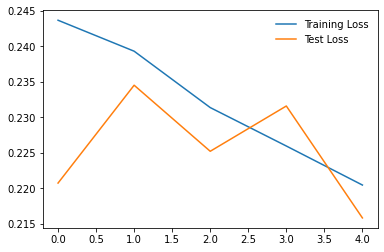

In [54]:
plot_validation()

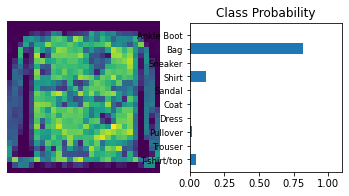

In [55]:
images, labels = next(iter(testloader))
img = inputs[6].view(1, 784)
test(img)